In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler


In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df = df.drop(columns='customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7016 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [99]:
df = df.fillna(df['TotalCharges'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


# 2.2 Remove variables with High Variable Correlation

In [100]:
ndf = df[['tenure','ServiceCount','MonthlyCharges','TotalCharges']]
ndf

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.50
2,2,4,53.85,108.15
3,45,4,42.30,1840.75
4,2,2,70.70,151.65
...,...,...,...,...
7038,24,8,84.80,1990.50
7039,72,7,103.20,7362.90
7040,11,2,29.60,346.45
7041,4,3,74.40,306.60


                  tenure  ServiceCount  MonthlyCharges  TotalCharges
tenure          1.000000      0.508526        0.247900      0.823701
ServiceCount    0.508526      1.000000        0.041463      0.443015
MonthlyCharges  0.247900      0.041463        1.000000      0.649299
TotalCharges    0.823701      0.443015        0.649299      1.000000


<AxesSubplot:>

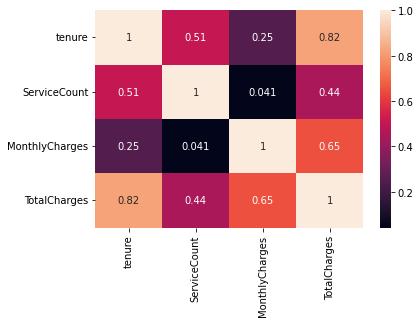

In [101]:
corr = ndf.corr()
print(corr)
sns.heatmap(corr,annot=True)

In [102]:
lower = pd.DataFrame(np.tril(corr, -1),columns = corr.columns)
print(lower)

     tenure  ServiceCount  MonthlyCharges  TotalCharges
0  0.000000      0.000000        0.000000           0.0
1  0.508526      0.000000        0.000000           0.0
2  0.247900      0.041463        0.000000           0.0
3  0.823701      0.443015        0.649299           0.0


In [103]:
to_drop = [column for column in lower if any(lower[column] > 0.6)]
print(to_drop)
df = df.drop(columns = to_drop)
print (to_drop)
print (df)
print (df.describe())

['tenure', 'MonthlyCharges']
['tenure', 'MonthlyCharges']
      gender  SeniorCitizen  ServiceCount        Contract PaperlessBilling  \
0     Female              0             2  Month-to-month              Yes   
1       Male              0             4        One year               No   
2       Male              0             4  Month-to-month              Yes   
3       Male              0             4        One year               No   
4     Female              0             2  Month-to-month              Yes   
...      ...            ...           ...             ...              ...   
7038    Male              0             8        One year              Yes   
7039  Female              0             7        One year              Yes   
7040  Female              0             2  Month-to-month              Yes   
7041    Male              1             3  Month-to-month              Yes   
7042    Male              0             7        Two year              Yes   

     

2.3

In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'].values)
df['gender'] = le.fit_transform(df['gender'].values)
df['Contract'] = le.fit_transform(df['Contract'].values)
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'].values)
print(df)



      gender  SeniorCitizen  ServiceCount  Contract  PaperlessBilling  \
0          0              0             2         0                 1   
1          1              0             4         1                 0   
2          1              0             4         0                 1   
3          1              0             4         1                 0   
4          0              0             2         0                 1   
...      ...            ...           ...       ...               ...   
7038       1              0             8         1                 1   
7039       0              0             7         1                 1   
7040       0              0             2         0                 1   
7041       1              1             3         0                 1   
7042       1              0             7         2                 1   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          

In [105]:
from sklearn.feature_selection import chi2
ddf = df[['Churn','gender','Contract','PaperlessBilling']]
Output = df[['Churn']]
Variables = df[['gender','Contract','PaperlessBilling']]
Chi_table = chi2(Variables,Output)

In [106]:
p_value = Chi_table[1]
# p_value[0]
lower = pd.DataFrame(np.tril(p_value, -1),columns = Variables.columns)
print(p_value)
# print(lower)
to_drop= [column for column in lower if any(lower[column] > 0.05)] #5% significant
df = df.drop(columns = to_drop)
print (to_drop)
df


[6.11015635e-001 1.22794132e-244 8.66198711e-025]
['gender']


,SeniorCitizen,ServiceCount,Contract,PaperlessBilling,TotalCharges,Churn
0,0,2,0,1,29.85,0
1,0,4,1,0,1889.50,0
2,0,4,0,1,108.15,1
3,0,4,1,0,1840.75,0
4,0,2,0,1,151.65,1
...,...,...,...,...,...,...
7038,0,8,1,1,1990.50,0
7039,0,7,1,1,7362.90,0
7040,0,2,0,1,346.45,0
7041,1,3,0,1,306.60,1
